<a href="https://colab.research.google.com/github/danielmpedrozo/russian_plate_ocr/blob/main/OCR_Pytesseract_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from time import sleep
import imutils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pytesseract


def tratamento_roi_img(img_roi):
    img_roi_gray = cv2.cvtColor(img_roi, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(img_roi_gray, 11, 17, 17)
    img_roi_binary = cv2.threshold(img_roi_gray, 80, 255, cv2.THRESH_BINARY)[1]
    img_roi_binary = cv2.resize(img_roi_binary, None, fx=4, fy=4)

    return img_roi_binary


def ocr_img(img_roi_binary):
    img_roi_binary = Image.fromarray(img_roi_binary)


    config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'

    text = pytesseract.image_to_string(img_roi_binary, lang='eng', config=config)
    text_f = []
    for letra in text:
      if letra in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'):
        text_f.append(letra)

    text_f = ''.join(text_f)

    return text_f


def draw_img(img, text, location):
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), thickness=5)
    img = cv2.putText(img, text=text, org=(location[0][0][1], location[1][0][0]), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2,
                    lineType=cv2.LINE_AA)
    return img


def pre_processing(gray_img):
  bfilter = cv2.bilateralFilter(gray_img, 11, 17, 17)
  edges = cv2.Canny(bfilter, 30, 200)
  thresh_img = cv2.threshold(edges, 127, 255, 0)[1]
  return thresh_img


def find_plate(img, thresh_img):
  keypoints = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break
  roi_img = img[location[0][0][1]:location[2][0][1], location[1][0][0]:location[0][0][0]]
  return [roi_img, approx]

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/PycharmProjects/russian_plate/car_images/IMG_4046 (1).png')

gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

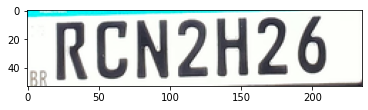

In [ ]:
thresh_frame = pre_processing(frame)

contour_frame, loc = find_plate(frame, thresh_frame)

plt.imshow(cv2.cvtColor(contour_frame, cv2.COLOR_BGR2RGB))

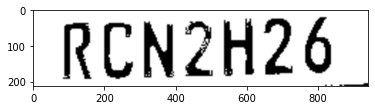

In [ ]:
img_roi = contour_frame

treated_img_roi = tratamento_roi_img(img_roi)

plt.imshow(cv2.cvtColor(treated_img_roi, cv2.COLOR_BGR2RGB))

In [ ]:
text = ocr_img(treated_img_roi)
text

'RCNZH26'

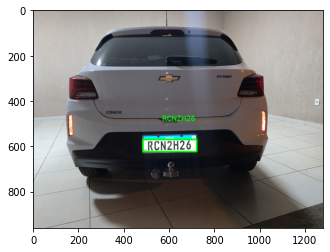

In [ ]:
frame = draw_img(frame, text, loc)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))